# CSC8111 - Machine Learning Coursework
###### Lakshmanan Balasubramanian
###### MSc Advanced Computer Science
###### 220237815 
Question 3

Importing all the packages to use for building the model 

In [174]:
# Pandas
import pandas as pd
# NumPy
import numpy as np
# Regular Expression
# To connect with Google drive
from google.colab import drive
drive.mount('/drive')
import re
# Matplotlib
import matplotlib.pyplot as plt 
%matplotlib inline
# Seaborn
import seaborn as sns
# sklearn feature extraction
from sklearn.feature_extraction.text import CountVectorizer
# Text Preprocessing & Cleaning
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split # Split Data 
from imblearn.over_sampling import SMOTE # Handling Imbalanced
# nltk
import nltk
from nltk.corpus import stopwords
from nltk import SnowballStemmer
from wordcloud import WordCloud,STOPWORDS

Drive already mounted at /drive; to attempt to forcibly remount, call drive.mount("/drive", force_remount=True).


In [175]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

### Data Exploration
The data is given which is downloaded and read using pandas. We have three datasets given where one is Training, Test and Development(Validation) data.

Let's explore the training data

In [176]:
# Tweets Training Dataset
df_training = pd.read_csv('/drive/My Drive/CSC8111 - Machine Learning Coursework/Question3/data/Tweets_train.csv')
df_training.head()

,tweet_id,text,airline_sentiment
0,569179849518161920,@united you're good. Thank you!,positive
1,569835751275433984,"@AmericanAir way to ruin a vacation, my brothe...",negative
2,568588936852799488,@JetBlue yes thankfully! Catering just got her...,positive
3,569525116725567491,@USAirways The automated message isn't helpful...,negative
4,568807823187976193,@JetBlue I'm #MakingLoveOutofNothingAtAll on m...,positive


Get the size of the training data

In [177]:
df_training.shape

(11858, 3)

So, in the training data there are totally 11,858 rows and 3 columns.

Let's explore the Tweets Testing data

In [178]:
# Tweet Testing Dataset
df_testing = pd.read_csv('/drive/My Drive/CSC8111 - Machine Learning Coursework/Question3/data/Tweets_test.csv', encoding="latin1")
df_testing.head()

,tweet_id,text,airline_sentiment
0,570252000000000000,@AmericanAir I need refund.,negative
1,568173000000000000,@USAirways after 3 Cancelled Flightlations and...,negative
2,569321000000000000,@JetBlue thanks so much. Can't wait to fly wit...,positive
3,569503000000000000,@united I have never been more frustrated than...,negative
4,568981000000000000,"@USAirways - the worst! Hold time crazy, agent...",negative


In [179]:
df_testing.shape

(1464, 3)

Let's explore the Tweets Validation data

In [180]:
# Development(Validation) set
df_validation = pd.read_csv('/drive/My Drive/CSC8111 - Machine Learning Coursework/Question3/data/Tweets_dev.csv')
df_validation.head()

,tweet_id,text,airline_sentiment
0,568107472260624384,@southwestair Great job celebrating #MardiGras...,positive
1,568215698524246016,@southwestair thanks for taking it up a notch!...,positive
2,567842466851905536,@USAirways Being put back on hold for what has...,negative
3,568834824410148864,@united Thank you for your offer! All sorted o...,positive
4,569590527349252096,@JetBlue wondering if it's possible for my col...,neutral


Let's get the size of the validation dataset.

In [181]:
df_validation.shape

(1318, 3)

### Data Preprocessing

So, all the three datasets has 3 columns "tweet_id", "text" and "airline_sentiment". Here the "airline_sentiment" will be our dependent variable (target class [y]) and "text" will be our independent variable [X]. Also, we don't need the "tweet_id" column and hence we will remove that.

#### 1) Data Pre-processing the Training Data, Testing data, Development(Validation) data
Let's begin with dataset for preprocessing

Here are the Text processing functions that will be used to process the Training and Testing data.

In [182]:
# Remove stop words
# Using the stopwords from NLTK we remove the stopwords (a, an, this, it, the, that)
def remove_stopwords(text):
    text = ' '.join([word for word in text.split() if word not in (stopwords.words('english'))])
    return text

# Remove URLS in the twitter
# Remove url  
def remove_url(text):
    url = re.compile(r'https?://\S+|www\.\S+')
    return url.sub(r'',text)

# Not Used -- Might remove
def removePunctuation(text):
    table = str.maketrans('', '', string.punctuation)
    return text.translate(table)

# Remove Twitter Username
def removeUserName(text):
    return re.sub('@[^\s]+', '', text)

# Remove the emoji images from the text
def removeEmoji(text):
    emoji_pattern = re.compile("["u"\U0001F600-\U0001F64F" u"\U0001F300-\U0001F5FF" u"\U0001F680-\U0001F6FF" u"\U0001F1E0-\U0001F1FF" u"\U00002702-\U000027B0" u"\U000024C2-\U0001F251""]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

# Removing the contraction text. The text that has the apostraphe. Eg(Won't, Don't and replace with will not, do not)
def removeContractionText(text):
    text = re.sub(r"won\'t", " will not", text)
    text = re.sub(r"won\'t've", " will not have", text)
    text = re.sub(r"can\'t", " can not", text)
    text = re.sub(r"don\'t", " do not", text)
    text = re.sub(r"can\'t've", " can not have", text)
    text = re.sub(r"ma\'am", " madam", text)
    text = re.sub(r"let\'s", " let us", text)
    text = re.sub(r"ain\'t", " am not", text)
    text = re.sub(r"shan\'t", " shall not", text)
    text = re.sub(r"sha\n't", " shall not", text)
    text = re.sub(r"o\'clock", " of the clock", text)
    text = re.sub(r"y\'all", " you all", text)
    text = re.sub(r"n\'t", " not", text)
    text = re.sub(r"n\'t've", " not have", text)
    text = re.sub(r"\'re", " are", text)
    text = re.sub(r"\'s", " is", text)
    text = re.sub(r"\'d", " would", text)
    text = re.sub(r"\'d've", " would have", text)
    text = re.sub(r"\'ll", " will", text)
    text = re.sub(r"\'ll've", " will have", text)
    text = re.sub(r"\'t", " not", text)
    text = re.sub(r"\'ve", " have", text)
    text = re.sub(r"\'m", " am", text)
    text = re.sub(r"\'re", " are", text)
    return text  

# Seperate alphanumeric characters if any
def seperate_alphanumeric(text):
    words = text
    words = re.findall(r"[^\W\d_]+|\d+", words)
    return " ".join(words)

def unique_char(rep, text):
    substitute = re.sub(r'(\w)\1+', rep, text)
    return substitute

def cont_rep_char(text):
    textchar = text.group(0)     
    if len(textchar) > 1:
        return textchar[0:2]
    
def character(text):
    substitute = re.sub(r'[^a-zA-Z]',' ',text)
    return substitute

Dropping the column "tweet_id" from both Training data and Testing data

In [183]:
# Training data
df_training.drop('tweet_id', inplace=True, axis=1)
# Testing data
df_testing.drop('tweet_id', inplace=True, axis=1)
# Development(Validation) data
df_validation.drop('tweet_id', inplace=True, axis=1)

In [184]:
# Display the Training data
df_training.head()

,text,airline_sentiment
0,@united you're good. Thank you!,positive
1,"@AmericanAir way to ruin a vacation, my brothe...",negative
2,@JetBlue yes thankfully! Catering just got her...,positive
3,@USAirways The automated message isn't helpful...,negative
4,@JetBlue I'm #MakingLoveOutofNothingAtAll on m...,positive


In [185]:
# Display the Testing data
df_testing.head()

,text,airline_sentiment
0,@AmericanAir I need refund.,negative
1,@USAirways after 3 Cancelled Flightlations and...,negative
2,@JetBlue thanks so much. Can't wait to fly wit...,positive
3,@united I have never been more frustrated than...,negative
4,"@USAirways - the worst! Hold time crazy, agent...",negative


In [186]:
# Display the Development(Validation) data
df_validation.head()

,text,airline_sentiment
0,@southwestair Great job celebrating #MardiGras...,positive
1,@southwestair thanks for taking it up a notch!...,positive
2,@USAirways Being put back on hold for what has...,negative
3,@united Thank you for your offer! All sorted o...,positive
4,@JetBlue wondering if it's possible for my col...,neutral


Identifying the number of each sentiments in Training data

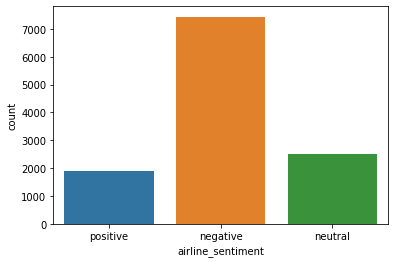

In [187]:
# Training data
sns.countplot(x="airline_sentiment", data=df_training)

From the above Histogram, we could see that the "airline_sentiment" contains more "negative" comments in the Training data

Identifying the number of each sentiments in Testing data

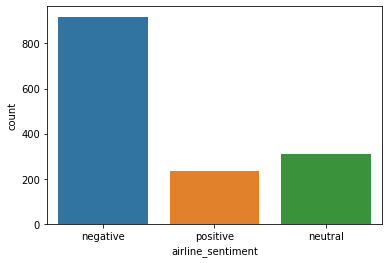

In [188]:
# Testing data
sns.countplot(x="airline_sentiment", data=df_testing)

From the above Histogram, we could see that the "airline_sentiment" contains more "negative" comments in the Testing data

Identifying the number of each sentiments in Development(Validation) data

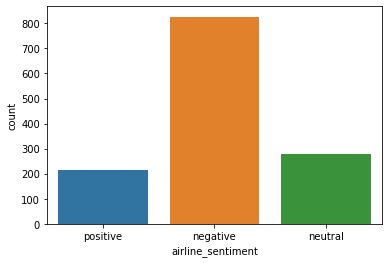

In [189]:
# Development(Validation) data
sns.countplot(x="airline_sentiment", data=df_validation)

From the above Histogram, we could see that the "airline_sentiment" contains more "negative" comments in the Development(Validation) data

#### Text processing.

We seperate the Independable data with the target data

In [190]:
# Training dataset
X_training_dataset = df_training.iloc[:, :-1].values
print(X_training_dataset)

[["@united you're good. Thank you!"]
 ['@AmericanAir way to ruin a vacation, my brother has called all night and had multiple places in line only to get dead air on call back']
 ['@JetBlue yes thankfully! Catering just got here and now they are loading, but very frustrated. I was supposed to be there by 10-10:30']
 ...
 ['@USAirways grades for this trip:\n\nFlight timeliness: 👎✈️\nCancelled Flightations: 👎😬\nCustomer Service: 👎😡\nFlight attendants: 😊👏']
 ["@united Thanks for the vague canned response that doesn't address the issue!"]
 ['@united already did that at the airport and 12 hrs Late Flightr its still not here! you guys are really killing me today. trying to stay positive..']]


In [191]:
# Testing dataset
X_testing_dataset = df_testing.iloc[:, :-1].values
print(X_testing_dataset)

[['@AmericanAir I need refund.']
 ['@USAirways after 3 Cancelled Flightlations and a delay, causing me to miss connecting flight. Another night not being home. Thanks #pathetic']
 ["@JetBlue thanks so much. Can't wait to fly with you guys :)"]
 ...
 ['@SouthwestAir just had a great flight #4223 with Damion! He was the best #damionflight4223']
 ['@AmericanAir Why did  AA973 return to JFK? Thanks :)']
 ['@AmericanAir How can I get a flight change while in the air? Delays causing a missed connection again. There is 1 seat for Late Flightr']]


In [192]:
# Development(Validation) dataset
X_validation_dataset = df_validation.iloc[:, :-1].values
print(X_validation_dataset)

[["@southwestair Great job celebrating #MardiGras2015 .  You own the industry . Another reason I'm nuts for you! http://t.co/8WBzOrRn3C"]
 ['@southwestair thanks for taking it up a notch!! leinenkugels #craftbeer #goodflight @ Norfolk… http://t.co/TgSLjjN6g0']
 ['@USAirways Being put back on hold for what has now been an HOUR is completely unacceptable.']
 ...
 ['@united Lost my wallet on flight 1007 yesterday from Houston to Bogota. Filled out your online form. No response yet.']
 ['@USAirways Travelling from pwm to atl on Sunday That flight got Cancelled Flightled and my new flight is Cancelled Flightled and got disconnected when reFlight Booking Problems']
 ['@SouthwestAir thank you :)']]


Now seperate the Dependable data with the target data

In [193]:
# Training dataset
y_training_dataset = df_training.iloc[:, -1].values
print(y_training_dataset)

['positive' 'negative' 'positive' ... 'negative' 'negative' 'negative']


In [194]:
# Testing dataset
y_testing_dataset = df_testing.iloc[:, -1].values
print(y_testing_dataset)

['negative' 'negative' 'positive' ... 'positive' 'neutral' 'negative']


In [195]:
# Development(Validation) dataset
y_validation_dataset = df_validation.iloc[:, -1].values
print(y_validation_dataset)

['positive' 'positive' 'negative' ... 'negative' 'negative' 'positive']


Let's convert the Dependent variable to a seperate data.

In [196]:
# Training data
# Display the dependent variable of the Training dataset in a Dataframe
df_dependent_training_dataset = pd.DataFrame(y_training_dataset, columns= ['Sentiment'])
df_dependent_training_dataset.head()

,Sentiment
0,positive
1,negative
2,positive
3,negative
4,positive


In [197]:
# Testing data
# Display the dependent variable of the Testing dataset in a Dataframe
df_dependent_testing_dataset = pd.DataFrame(y_testing_dataset, columns= ['Sentiment'])
df_dependent_testing_dataset.head()

,Sentiment
0,negative
1,negative
2,positive
3,negative
4,negative


In [198]:
# Development(Validation) data
# Display the dependent variable of the Validation dataset in a Dataframe
df_dependent_validation_dataset = pd.DataFrame(y_validation_dataset, columns= ['Sentiment'])
df_dependent_validation_dataset.head()

,Sentiment
0,positive
1,positive
2,negative
3,positive
4,neutral


Let's convert the Independent variable to a seperate data.

In [199]:
# Training dataset
# Display the independent variable of the Training dataset in a Dataframe
df_independent_training_dataset = pd.DataFrame(X_training_dataset, columns= ['TEXT'])
df_independent_training_dataset.head()

,TEXT
0,@united you're good. Thank you!
1,"@AmericanAir way to ruin a vacation, my brothe..."
2,@JetBlue yes thankfully! Catering just got her...
3,@USAirways The automated message isn't helpful...
4,@JetBlue I'm #MakingLoveOutofNothingAtAll on m...


In [200]:
df_independent_training_dataset.shape

(11858, 1)

There are only totally 11,858 rows in the Training data.

In [201]:
# Testing data
# Display the independent variable of the Testing in a Dataframe
df_independent_testing_dataset = pd.DataFrame(X_testing_dataset, columns= ['TEXT'])
df_independent_testing_dataset.head()

,TEXT
0,@AmericanAir I need refund.
1,@USAirways after 3 Cancelled Flightlations and...
2,@JetBlue thanks so much. Can't wait to fly wit...
3,@united I have never been more frustrated than...
4,"@USAirways - the worst! Hold time crazy, agent..."


In [202]:
df_independent_testing_dataset.shape

(1464, 1)

There are only around 1464 rows in the Testing data.

In [203]:
# Development(Validation) data
# Display the independent variable of the Validation in a Dataframe
df_independent_validation_dataset = pd.DataFrame(X_validation_dataset, columns= ['TEXT'])
df_independent_validation_dataset.head()

,TEXT
0,@southwestair Great job celebrating #MardiGras...
1,@southwestair thanks for taking it up a notch!...
2,@USAirways Being put back on hold for what has...
3,@united Thank you for your offer! All sorted o...
4,@JetBlue wondering if it's possible for my col...


In [204]:
df_independent_validation_dataset.shape

(1318, 1)

There are only around 1318 rows in the Validation data.

Let's see what are all the most common words used in the twitter text for the class "Negative" in the <b>Training data</b>. We will create a <b>Word Cloud</b> for the Negative comments

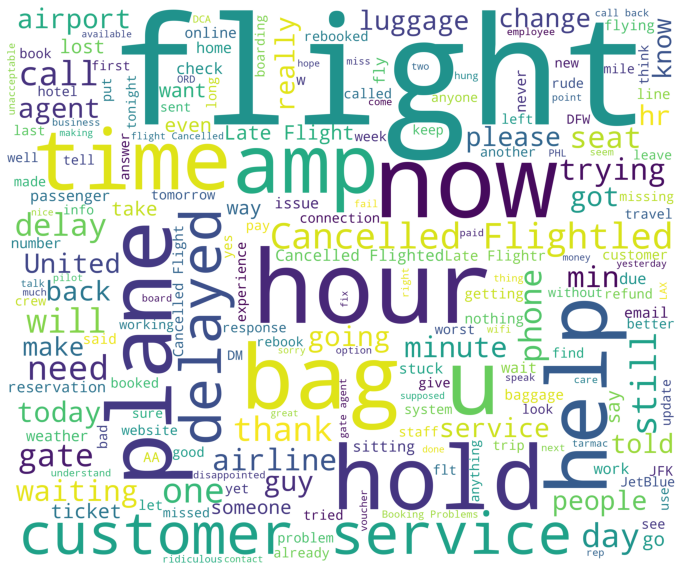

In [205]:
new_df=df_training[df_training['airline_sentiment']=='negative']
words = ' '.join(new_df['text'])
cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and word != 'RT'
                            ])
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='white',
                      width=3000,
                      height=2500
                     ).generate(cleaned_word)
plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

Let's see what are all the most common words used in the twitter text for the class "Positive" in the <b>Training data</b>. We will create a <b>Word Cloud</b> for the Positve comments

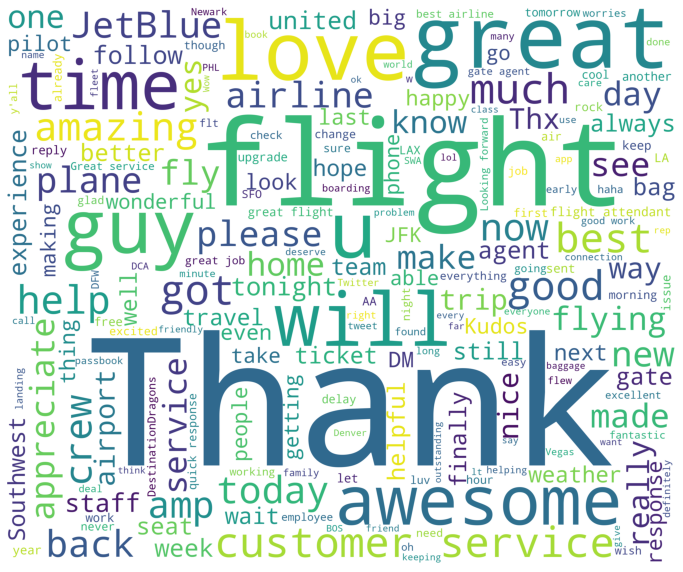

In [206]:
new_df=df_training[df_training['airline_sentiment']=='positive']
words = ' '.join(new_df['text'])
cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and word != 'RT'
                            ])
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='white',
                      width=3000,
                      height=2500
                     ).generate(cleaned_word)
plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

Let's see what are all the most common words used in the twitter text for the class "Neutral" in the <b>Training data</b>. We will create a <b>Word Cloud</b> for the Neutral comments

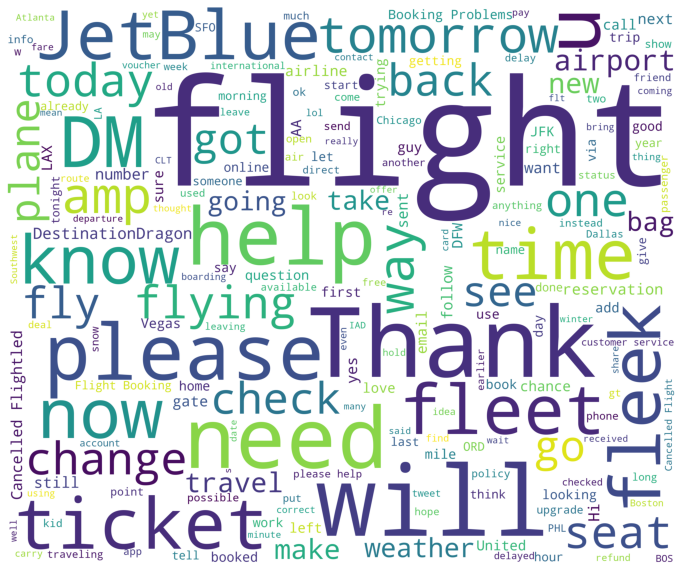

In [207]:
new_df=df_training[df_training['airline_sentiment']=='neutral']
words = ' '.join(new_df['text'])
cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and word != 'RT'
                            ])
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='white',
                      width=3000,
                      height=2500
                     ).generate(cleaned_word)
plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

Let's convert the target Class label (y) to integer. We will set a integer for the classes.
<ul>
    <li>Negative - 0</li>
     <li>Neutral - 1</li>
    <li>Positive - 2</li>

In [208]:
# Training dataset
df_dependent_training_dataset['Sentiment'] = df_dependent_training_dataset.Sentiment.replace(to_replace=['negative', 'neutral', 'positive'], value=[0, 1, 2])
df_dependent_training_dataset.head()

,Sentiment
0,2
1,0
2,2
3,0
4,2


In [209]:
# Testing dataset
df_dependent_testing_dataset['Sentiment'] = df_dependent_testing_dataset.Sentiment.replace(to_replace=['negative', 'neutral', 'positive'], value=[0, 1, 2])
df_dependent_testing_dataset.head()

,Sentiment
0,0
1,0
2,2
3,0
4,0


In [210]:
# Development(Validation) dataset
df_dependent_validation_dataset['Sentiment'] = df_dependent_validation_dataset.Sentiment.replace(to_replace=['negative', 'neutral', 'positive'], value=[0, 1, 2])
df_dependent_validation_dataset.head()

,Sentiment
0,2
1,2
2,0
3,2
4,1


Now, we have assigned the integer values to the Sentiments.

Let's do some text processing

Text Processing for the Training data.

In [211]:
df_independent_training_dataset['TEXT'] = df_independent_training_dataset['TEXT'].apply(lambda x : remove_stopwords(x))
df_independent_training_dataset['TEXT'] = df_independent_training_dataset['TEXT'].apply(lambda x : remove_url(x))
df_independent_training_dataset['TEXT'] = df_independent_training_dataset['TEXT'].apply(lambda x : removeUserName(x))
df_independent_training_dataset['TEXT'] = df_independent_training_dataset['TEXT'].apply(lambda x : removeEmoji(x))
df_independent_training_dataset['TEXT'] = df_independent_training_dataset['TEXT'].apply(lambda x : removeContractionText(x))
df_independent_training_dataset['TEXT'] = df_independent_training_dataset['TEXT'].apply(lambda x : seperate_alphanumeric(x))
df_independent_training_dataset['TEXT'] = df_independent_training_dataset['TEXT'].apply(lambda x : unique_char(cont_rep_char, x))
df_independent_training_dataset['TEXT'] = df_independent_training_dataset['TEXT'].apply(lambda x : character(x))
df_independent_training_dataset['TEXT'] = df_independent_training_dataset['TEXT'].apply(lambda x : x.lower())

In [212]:
df_independent_training_dataset.head()

,TEXT
0,good thank you
1,way ruin vacation brother called night multipl...
2,yes thankfully catering got loading frustrated...
3,the automated message helpful impossible speak...
4,i am makingloveoutofnothingatall brandloveaffa...


Text processing for the Testing Data

In [213]:
df_independent_testing_dataset['TEXT'] = df_independent_testing_dataset['TEXT'].apply(lambda x : remove_stopwords(x))
df_independent_testing_dataset['TEXT'] = df_independent_testing_dataset['TEXT'].apply(lambda x : remove_url(x))
df_independent_testing_dataset['TEXT'] = df_independent_testing_dataset['TEXT'].apply(lambda x : removeUserName(x))
df_independent_testing_dataset['TEXT'] = df_independent_testing_dataset['TEXT'].apply(lambda x : removeEmoji(x))
df_independent_testing_dataset['TEXT'] = df_independent_testing_dataset['TEXT'].apply(lambda x : removeContractionText(x))
df_independent_testing_dataset['TEXT'] = df_independent_testing_dataset['TEXT'].apply(lambda x : seperate_alphanumeric(x))
df_independent_testing_dataset['TEXT'] = df_independent_testing_dataset['TEXT'].apply(lambda x : unique_char(cont_rep_char, x))
df_independent_testing_dataset['TEXT'] = df_independent_testing_dataset['TEXT'].apply(lambda x : character(x))
df_independent_testing_dataset['TEXT'] = df_independent_testing_dataset['TEXT'].apply(lambda x : x.lower())

In [214]:
df_independent_testing_dataset.head()

,TEXT
0,i need refund
1,cancelled flightlations delay causing miss c...
2,thanks much ca not wait fly guys
3,i never frustrated conversations united can no...
4,worst hold time crazy agents horrible accounta...


In [215]:
df_independent_validation_dataset['TEXT'] = df_independent_validation_dataset['TEXT'].apply(lambda x : remove_stopwords(x))
df_independent_validation_dataset['TEXT'] = df_independent_validation_dataset['TEXT'].apply(lambda x : remove_url(x))
df_independent_validation_dataset['TEXT'] = df_independent_validation_dataset['TEXT'].apply(lambda x : removeUserName(x))
df_independent_validation_dataset['TEXT'] = df_independent_validation_dataset['TEXT'].apply(lambda x : removeEmoji(x))
df_independent_validation_dataset['TEXT'] = df_independent_validation_dataset['TEXT'].apply(lambda x : removeContractionText(x))
df_independent_validation_dataset['TEXT'] = df_independent_validation_dataset['TEXT'].apply(lambda x : seperate_alphanumeric(x))
df_independent_validation_dataset['TEXT'] = df_independent_validation_dataset['TEXT'].apply(lambda x : unique_char(cont_rep_char, x))
df_independent_validation_dataset['TEXT'] = df_independent_validation_dataset['TEXT'].apply(lambda x : character(x))
df_independent_validation_dataset['TEXT'] = df_independent_validation_dataset['TEXT'].apply(lambda x : x.lower())

In [216]:
df_independent_validation_dataset.head()

,TEXT
0,great job celebrating mardigras you indus...
1,thanks taking notch leinenkugels craftbeer goo...
2,being put back hold hour completely unacceptable
3,thank offer all sorted
4,wondering possible colleague i get earlier fli...


Now, Let's use the snowballstemmer to process the string to create stemming algorithms.

In [217]:
sbs = SnowballStemmer(language='english')

In [218]:
# Stemmer string processing function.
def stemmer(text):
    text = [sbs.stem(word) for word in text.split(' ')]
    text = " ".join(text)
    return text

In [219]:
# Stemmer function for Training set.
df_independent_training_dataset.TEXT = df_independent_training_dataset.TEXT.apply(stemmer)
# Display the training dataset
df_independent_training_dataset['TEXT']

0                                           good thank you
1        way ruin vacat brother call night multipl plac...
2        yes thank cater got load frustrat i suppos    ...
3        the autom messag help imposs speak human right...
4        i am makingloveoutofnothingatal brandloveaffai...
                               ...                        
11853    help us phone gate checkin i book travel clien...
11854    worst custom servic line i have call   time to...
11855    grade trip flight timeli cancel flightat custo...
11856                  thank vagu can respons address issu
11857    alreadi airport    hrs late flightr still here...
Name: TEXT, Length: 11858, dtype: object

In [220]:
# Stemmer function for Testing dataset.
df_independent_testing_dataset.TEXT = df_independent_testing_dataset.TEXT.apply(stemmer)
# Display the Testing dataset
df_independent_testing_dataset['TEXT']

0                                           i need refund
1         cancel flightlat delay caus miss connect fli...
2                          thank much ca not wait fli guy
3       i never frustrat convers unit can not speak sp...
4       worst hold time crazi agent horribl account us...
                              ...                        
1459    i miss flight american airlin gave ticket well...
1460    here is sit hold   hrs flight cancel flight di...
1461    great flight      damion he best damionflight ...
1462                          whi aa     return jfk thank
1463    how i get flight chang air delay caus miss con...
Name: TEXT, Length: 1464, dtype: object

In [221]:
# Stemmer function for Development(Validation) dataset.
df_independent_validation_dataset.TEXT = df_independent_validation_dataset.TEXT.apply(stemmer)
# Display the validation dataset
df_independent_validation_dataset['TEXT']

0       great job celebr mardigra      you industri an...
1       thank take notch leinenkugel craftbeer goodfli...
2                  be put back hold hour complet unaccept
3                                    thank offer all sort
4       wonder possibl colleagu i get earlier flight l...
                              ...                        
1313       sorri disappoint outoftouchwithr peopl kid job
1314    stuck plane dalla that is suppos go okc there ...
1315    lost wallet flight      yesterday houston bogo...
1316    travel pwm atl sunday that flight got cancel f...
1317                                                thank
Name: TEXT, Length: 1318, dtype: object

Let's vectorize the independent variable of the training and testing data using TfidfVectorizer

In [222]:
# Training dataset
X_training_dataset = df_independent_training_dataset['TEXT']
y_training_dataset = df_dependent_training_dataset['Sentiment']

In [223]:
# Testing dataset
X_testing_dataset = df_independent_testing_dataset['TEXT']
y_testing_dataset = df_dependent_testing_dataset['Sentiment']

In [224]:
# Devlopment(Validation) dataset
X_validation_dataset = df_independent_validation_dataset['TEXT']
y_validation_dataset = df_dependent_validation_dataset['Sentiment']

In [225]:
# TfidVectorizer for Training data.
tfid = TfidfVectorizer()
X_training_final =  tfid.fit_transform(X_training_dataset)
X_testing_final =  tfid.transform(X_testing_dataset) 
X_validation_final = tfid.transform(X_validation_dataset)

In [226]:
print(X_training_final.shape)
print(X_testing_final.shape)
print(X_validation_final.shape)

(11858, 7624)
(1464, 7624)
(1318, 7624)


Now, we use the <b>"SMOTE"</b> to do some imbalance correction.

In [227]:
# Handling imbalance
# Handling imbalanced using SMOTE
smote_correction = SMOTE()

# Training Dataset
x_sm_training,y_sm_training = smote_correction.fit_resample(X_training_final,y_training_dataset)
# Testing dataset
x_sm_testing,y_sm_testing = smote_correction.fit_resample(X_testing_final,y_testing_dataset)
# Validation dataset
x_sm_validation, y_sm_validation = smote_correction.fit_resample(X_validation_final, y_validation_dataset)

In [228]:
# Model Building
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier 
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report , confusion_matrix , accuracy_score # Performance Metrics  
from sklearn.metrics import f1_score

## Modeling

Let's use the preprocessed Training data and Validation data to feed into the model. We will try different models like Random Forest, Support Vector Machine and Decision Tree.

In [229]:
best_algorithm_List_validation_set = []
best_algorithm_Dict_validation_Set = {}

### Random Forest Classifier
We use the Training data to fit into the model and then the validation data to predict and get the score.

In [230]:
# Modelling
# Random Forest Classifier
random_forest_classifier = RandomForestClassifier()
random_forest_classifier.fit(x_sm_training,y_sm_training)
random_forest_classifier_prediction =  random_forest_classifier.predict(x_sm_validation)
# Calculate the F1 score
rf_f1_score = f1_score(y_sm_validation, random_forest_classifier_prediction, average='micro')
print("Random Forest Classifier F1 Score: ", np.round(rf_f1_score, 2))
best_algorithm_Dict_validation_Set = {"Algorithm": "Random Forest", "Accuracy": np.round(rf_f1_score, 2)}
best_algorithm_List_validation_set.append(best_algorithm_Dict_validation_Set)

Random Forest Classifier F1 Score:  0.78


### Support Vector Machine (SVM)
We use the Training data to fit into the model and then the validation data to predict and get the score.

In [231]:
# Support Vector Machine
svm = SVC()
svm.fit(x_sm_training,y_sm_training)
svm_prediction =  svm.predict(x_sm_validation)
# Calculate F1 Score
svm_f1_score = f1_score(y_sm_validation, svm_prediction, average='micro')
print("Support Vector Machine Classifier F1 Score:", np.round(svm_f1_score, 2))
best_algorithm_Dict_validation_Set = {"Algorithm": "Support Vector Machine", "Accuracy": np.round(svm_f1_score, 2)}
best_algorithm_List_validation_set.append(best_algorithm_Dict_validation_Set)

Support Vector Machine Classifier F1 Score: 0.81


### Decision Tree
We use the Training data to fit into the model and then the validation data to predict and get the score.

In [232]:
# Decision Tree
des_tree_classifier = DecisionTreeClassifier()
des_tree_classifier.fit(x_sm_training,y_sm_training)
des_tree_classifier_prediction=des_tree_classifier.predict(x_sm_validation)
# Calculate F1 Score
dt_f1_score = f1_score(y_sm_validation, des_tree_classifier_prediction, average='micro')
print("Decision Tree Classifier F1 Score: ", np.round(dt_f1_score, 2))
best_algorithm_Dict_validation_Set = {"Algorithm": "Decision Tree", "Accuracy": np.round(dt_f1_score, 2)}
best_algorithm_List_validation_set.append(best_algorithm_Dict_validation_Set)

Decision Tree Classifier F1 Score:  0.69


Let's see which model gave us the best accuracy score

In [233]:
df_best_Algo_validation_set = pd.DataFrame.from_dict(best_algorithm_List_validation_set)
# Print the table
df_best_Algo_validation_set.head()

,Algorithm,Accuracy
0,Random Forest,0.78
1,Support Vector Machine,0.81
2,Decision Tree,0.69


From the above table, we can see that <b>Support Vector Machine</b> has the best accuracy. Let's get a report of Support Vector Machine

In [234]:
# Visualize the best model
cr = classification_report(y_sm_validation, svm_prediction)
print("Classification Report: SVM \n----------------------\n", cr)

Classification Report: SVM 
----------------------
               precision    recall  f1-score   support

           0       0.73      0.94      0.82       826
           1       0.83      0.68      0.75       826
           2       0.90      0.80      0.84       826

    accuracy                           0.81      2478
   macro avg       0.82      0.81      0.81      2478
weighted avg       0.82      0.81      0.81      2478



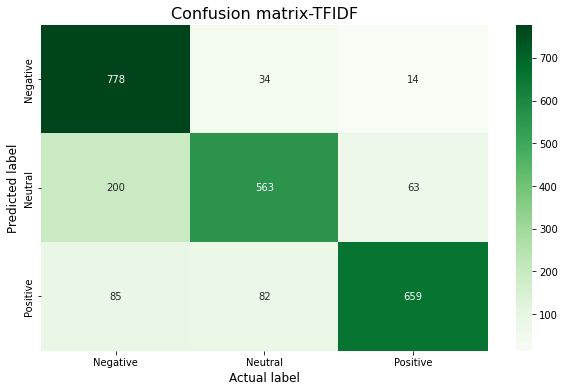

In [235]:
cm = confusion_matrix(y_sm_validation,svm_prediction)
# plot confusion matrix 
plt.figure(figsize=(10,6))
sentiment_classes = ['Negative', 'Neutral', 'Positive']
sns.heatmap(cm, cmap=plt.cm.Greens, annot=True, fmt='d', 
            xticklabels=sentiment_classes,
            yticklabels=sentiment_classes)
plt.title('Confusion matrix-TFIDF', fontsize=16)
plt.xlabel('Actual label', fontsize=12)
plt.ylabel('Predicted label', fontsize=12)
plt.show()

## Modelling
Let's use the preprocessed Training data and Testing data to feed into the model. We will try different models like Random Forest, Support Vector Machine and Decision Tree.

In [236]:
best_algorithm_Dict_testing_set = {}
best_algorithm_List_testing_set = []

### Random Forest Classifier
We use the Training data to fit into the model and then the Testing data to predict and get the score.

In [237]:
# Random Forest Classifier
random_forest_classifier = RandomForestClassifier()
random_forest_classifier.fit(x_sm_training,y_sm_training)
random_forest_classifier_prediction =  random_forest_classifier.predict(x_sm_testing)
# Calculate the F1 score
rf_f1_score = f1_score(y_sm_testing, random_forest_classifier_prediction, average='micro')
print("Random Forest Classifier F1 Score: ", np.round(rf_f1_score, 2))
best_algorithm_Dict_testing_set = {"Algorithm": "Random Forest", "Accuracy": np.round(rf_f1_score, 2)}
best_algorithm_List_testing_set.append(best_algorithm_Dict_testing_set)

Random Forest Classifier F1 Score:  0.77


In [238]:
# Support Vector Machine
svm = SVC()
svm.fit(x_sm_training,y_sm_training)
svm_prediction =  svm.predict(x_sm_testing)
# Calculate F1 Score
svm_f1_score = f1_score(y_sm_testing, svm_prediction, average='micro')
print("Support Vector Machine Classifier F1 Score:", np.round(svm_f1_score, 2))
best_algorithm_Dict_testing_set = {"Algorithm": "Support Vector Machine", "Accuracy": np.round(svm_f1_score, 2)}
best_algorithm_List_testing_set.append(best_algorithm_Dict_testing_set)

Support Vector Machine Classifier F1 Score: 0.81


In [239]:
# Decision Tree
des_tree_classifier = DecisionTreeClassifier()
des_tree_classifier.fit(x_sm_training,y_sm_training)
des_tree_classifier_prediction=des_tree_classifier.predict(x_sm_testing)
# Calculate F1 Score
dt_f1_score = f1_score(y_sm_testing, des_tree_classifier_prediction, average='micro')
print("Decision Tree Classifier F1 Score: ", np.round(dt_f1_score, 2))
best_algorithm_Dict_testing_set = {"Algorithm": "Decision Tree", "Accuracy": np.round(dt_f1_score, 2)}
best_algorithm_List_testing_set.append(best_algorithm_Dict_testing_set)

Decision Tree Classifier F1 Score:  0.68


In [240]:
df_best_Algo_testing_set = pd.DataFrame.from_dict(best_algorithm_List_testing_set)
# Print the table
df_best_Algo_testing_set.head()

,Algorithm,Accuracy
0,Random Forest,0.77
1,Support Vector Machine,0.81
2,Decision Tree,0.68


From the above table, we could see that Support Vector Machine classifer (SVM) has the best accuracy. <br>
Let's evaluate by using Classification report.

In [241]:
# Classification report of Random Forest
cr = classification_report(y_sm_testing, random_forest_classifier_prediction)
print("Classification Report: Random Forest \n----------------------\n", cr)

Classification Report: Random Forest 
----------------------
               precision    recall  f1-score   support

           0       0.71      0.88      0.78       918
           1       0.79      0.62      0.69       918
           2       0.83      0.80      0.81       918

    accuracy                           0.77      2754
   macro avg       0.77      0.77      0.76      2754
weighted avg       0.77      0.77      0.76      2754



In [242]:
# Classification report of Decision Tree
cr = classification_report(y_sm_testing, des_tree_classifier_prediction)
print("Classification Report: Decision Tree \n----------------------\n", cr)

Classification Report: Decision Tree 
----------------------
               precision    recall  f1-score   support

           0       0.64      0.78      0.70       918
           1       0.68      0.53      0.59       918
           2       0.74      0.75      0.74       918

    accuracy                           0.68      2754
   macro avg       0.69      0.68      0.68      2754
weighted avg       0.69      0.68      0.68      2754



In [243]:
# Classification report of Support Vector Machine
cr = classification_report(y_sm_testing, svm_prediction)
print("Classification Report: SVM \n----------------------\n", cr)

Classification Report: SVM 
----------------------
               precision    recall  f1-score   support

           0       0.75      0.95      0.84       918
           1       0.84      0.70      0.77       918
           2       0.88      0.79      0.83       918

    accuracy                           0.81      2754
   macro avg       0.82      0.81      0.81      2754
weighted avg       0.82      0.81      0.81      2754



Let's plot the confusion matrix for all the three model.

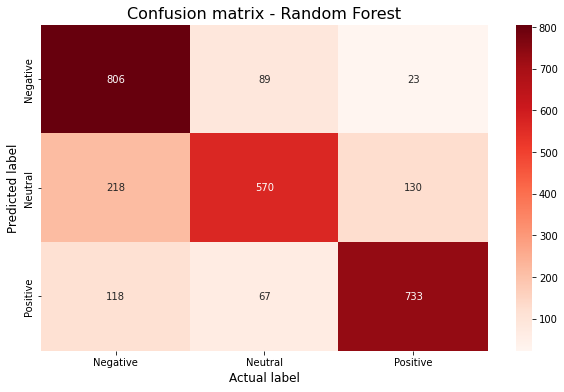

In [244]:
# Confusion Matrix for Random Forest
cm = confusion_matrix(y_sm_testing,random_forest_classifier_prediction)
# plot confusion matrix 
plt.figure(figsize=(10,6))
sentiment_classes = ['Negative', 'Neutral', 'Positive']
sns.heatmap(cm, cmap=plt.cm.Reds, annot=True, fmt='d', 
            xticklabels=sentiment_classes,
            yticklabels=sentiment_classes)
plt.title('Confusion matrix - Random Forest', fontsize=16)
plt.xlabel('Actual label', fontsize=12)
plt.ylabel('Predicted label', fontsize=12)
plt.show()

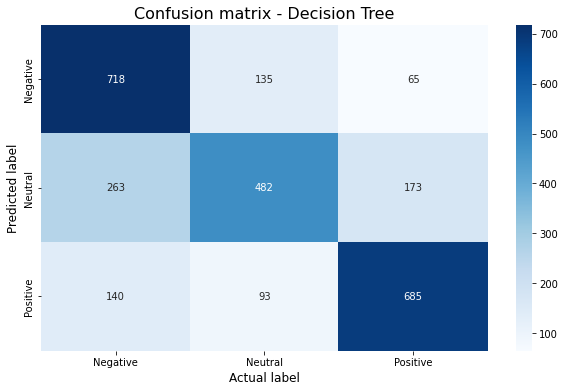

In [245]:
# Confusion Matrix for Random Forest
cm = confusion_matrix(y_sm_testing, des_tree_classifier_prediction)
# plot confusion matrix 
plt.figure(figsize=(10,6))
sentiment_classes = ['Negative', 'Neutral', 'Positive']
sns.heatmap(cm, cmap=plt.cm.Blues, annot=True, fmt='d', 
            xticklabels=sentiment_classes,
            yticklabels=sentiment_classes)
plt.title('Confusion matrix - Decision Tree', fontsize=16)
plt.xlabel('Actual label', fontsize=12)
plt.ylabel('Predicted label', fontsize=12)
plt.show()

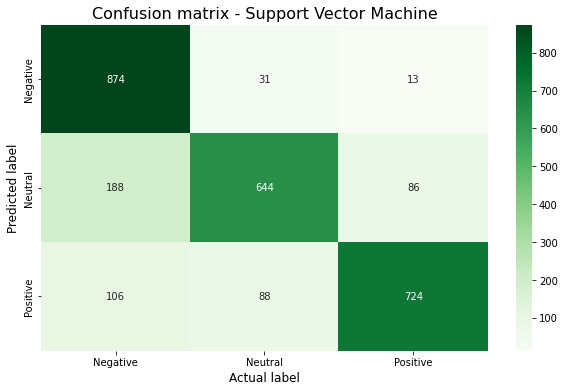

In [246]:
cm = confusion_matrix(y_sm_testing,svm_prediction)
# plot confusion matrix 
plt.figure(figsize=(10,6))
sentiment_classes = ['Negative', 'Neutral', 'Positive']
sns.heatmap(cm, cmap=plt.cm.Greens, annot=True, fmt='d', 
            xticklabels=sentiment_classes,
            yticklabels=sentiment_classes)
plt.title('Confusion matrix - Support Vector Machine', fontsize=16)
plt.xlabel('Actual label', fontsize=12)
plt.ylabel('Predicted label', fontsize=12)
plt.show()